# Jupyter notebook de avaliação dos dados da produção da Brazilian FISH mensalmente (toneladas)

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import xlsxwriter
from tabulate import tabulate
import seaborn as sns

#from google.colab import drive
#from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer
# Required Libraries
import os


In [2]:
# Define the folder path where your Excel files are stored
folder_path = 'vendasunidade3parafrigorifico2022'

# Initialize an empty dataframe to store the data from all Excel files
combined_df = pd.DataFrame()

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the Excel file into a dataframe
        excel_data = pd.read_excel(file_path)  # You might need additional arguments based on your Excel file
        
        # Append the data from the current Excel file to the combined dataframe
        combined_df = combined_df.append(excel_data, ignore_index=True)

# Now combined_df contains the data from all Excel files in the folder
print(combined_df)

C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

     ID LOTE DATA ENTRADA DATA MOVIMENTAÇÃO   n° DIAS  HORA APLICATIVO  \
0       7325   2022-01-13        2022-04-04        81              NaN   
1       7607   2022-01-31        2022-04-04        63              NaN   
2       7489   2022-01-24        2022-04-04        70              NaN   
3       7361   2022-01-17        2022-04-04        77              NaN   
4       7600   2022-01-28        2022-04-04        66              NaN   
..       ...          ...               ...       ...              ...   
649     9450   2022-06-18        2022-09-28       102              NaN   
650     9564   2022-06-29        2022-09-29        92              NaN   
651     9316   2022-06-09        2022-09-29       112              NaN   
652     9436   2022-06-17        2022-09-29       104              NaN   
653     9308   2022-06-08        2022-09-29       113              NaN   

    TANQUE ORIGEM    LINHA ORIGEM  ORDEM LINHA    UNIDADE         LOTE  ...  \
0           TR689  U.3 - LINHA 0

C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_16604\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)


In [3]:
combined_df.columns = combined_df.columns.str.strip()

In [4]:
#combined_df_num=combined_df.select_dtypes(include='number')
combined_df.isnull().sum().sort_values(ascending=False)

HORA APLICATIVO            654
LINHA ORIGEM                97
SALDO DIA ANTERIOR           8
BIOMASSA ESPERADA TOTAL      8
BIOMASSA ESPERADA            8
PERCENTUAL PREV X REAL       8
DIF. PESO                    8
PESO ESPERADO                8
CURVA                        0
TIPO                         0
MOTIVO DE DESCARTE           0
JUSTIFICATIVA                0
ESPECIE                      0
ID LOTE                      0
% MORTE DIA ANTERIOR         0
LOTE DESTINO                 0
TANQUE DESTINO               0
FASE DESTINO                 0
TAMANHO DESTINO              0
LINHA DESTINO                0
ORDEM LINHA DESTINO          0
UNIDADE DESTINO              0
TIPO DESTINO                 0
TIPO ORIGEM                  0
BIOMASSA                     0
DATA ENTRADA                 0
PESO                         0
QUANTIDADE                   0
SOBREVIVENCIA                0
TAMANHO ORIGEM               0
FASE ORIGEM                  0
CONVERSÃO                    0
QTD INIC

In [7]:
combined_df = combined_df.drop(columns=[
'HORA APLICATIVO',
'LOTE DESTINO',
'TANQUE DESTINO',
'FASE DESTINO',
'TAMANHO DESTINO',
'LINHA DESTINO',
'ORDEM LINHA DESTINO',
'UNIDADE DESTINO',
'TIPO DESTINO'
])

combined_df.head()

KeyError: "['HORA APLICATIVO', 'UNIDADE DESTINO '] not found in axis"

In [8]:
combined_df

,ID LOTE,DATA ENTRADA,DATA MOVIMENTAÇÃO,n° DIAS,TANQUE ORIGEM,LINHA ORIGEM,ORDEM LINHA,UNIDADE,LOTE,QTD INICIAL,...,TIPO ORIGEM,LOTE DESTINO,TANQUE DESTINO,FASE DESTINO,TAMANHO DESTINO,LINHA DESTINO,ORDEM LINHA DESTINO,UNIDADE DESTINO,TIPO DESTINO,USUARIO
0,7325,2022-01-13,2022-04-04,81,TR689,U.3 - LINHA 07,8,Unidade 3,L053-VAC,8041,...,Engorda,-,-,-,-,-,-,-,-,Nathan
1,7607,2022-01-31,2022-04-04,63,TR246,U.3 - LINHA 10,19,Unidade 3,L054-VAC-Z,4081,...,Engorda,-,-,-,-,-,-,-,-,Nathan
2,7489,2022-01-24,2022-04-04,70,TR222,U.3 - LINHA 08,3,Unidade 3,L048-VAC,4058,...,Engorda,-,-,-,-,-,-,-,-,Nathan
3,7361,2022-01-17,2022-04-04,77,TR634,U.3 - LINHA 13,16,Unidade 3,L050-VAC,8389,...,Engorda,-,-,-,-,-,-,-,-,Nathan
4,7600,2022-01-28,2022-04-04,66,TR247,U.3 - LINHA 10,17,Unidade 3,L054-VAC-Z,4014,...,Engorda,-,-,-,-,-,-,-,-,Nathan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,9450,2022-06-18,2022-09-28,102,TR196,U.3 - LINHA 10,14,Unidade 3,L001-VAC-GS,4239,...,Engorda,-,-,-,-,-,-,-,-,Leandro Adm. Unidade3
650,9564,2022-06-29,2022-09-29,92,TR618,U.3 - LINHA 01,6,Unidade 3,L060-VAC,8226,...,Engorda,-,-,-,-,-,-,-,-,Leandro Adm. Unidade3
651,9316,2022-06-09,2022-09-29,112,TR667,U.3 - LINHA 13,14,Unidade 3,L063-VAC,8000,...,Engorda,-,-,-,-,-,-,-,-,Leandro Adm. Unidade3
652,9436,2022-06-17,2022-09-29,104,TR704,U.3 - LINHA 11,17,Unidade 3,L001-VAC-GS,8561,...,Engorda,-,-,-,-,-,-,-,-,Leandro Adm. Unidade3


In [2]:
dataset = pd.DataFrame()
file = pd.ExcelFile('data\C_DADOS_BZF.xlsx')
sheets_list = ['Produção', 'Industria', 'Descrição']
for sheet in sheets_list:
    if 'Descrição' != sheet:
        temp_df = pd.read_excel(file, sheet_name=sheet)
        dataset = pd.concat([dataset, temp_df])
first_list = temp_df.columns.tolist()
temp_df = dataset.reset_index(drop=True)
#dataset.head()
len(dataset)

4504

In [3]:
xls = pd.ExcelFile('data\C_DADOS_BZF.xlsx')
prod= pd.read_excel(xls, 'Produção')
ind= pd.read_excel(xls, 'Industria')

In [4]:
## Eliminar espacos dos nomes das colunas
prod.columns = prod.columns.str.strip()

In [5]:
for col in prod.select_dtypes(include='object').columns:
    print(col)

Unidade
Tanque
Fase
Tamanho
Lote
Data Encerramento
Curva
Status
Espécie
Tipo Tanque
Linha
Produto Origem
Fornecedor Origem


In [6]:
prod = prod.drop(columns=[
'Unidade',
'Tanque',
'Tamanho',
'Lote',
'Curva',
'Status',
'Espécie',
'Tipo Tanque',
'Linha',
'Produto Origem',
'Fornecedor Origem',
'Peso Estimado Biometria',
'Biomassa Biometria',
'Peso Médio Últ. Biometria',
'Peso Médio Biometria',
'Biomassa Despesca',
'Peso Médio Despesca',
'Densidade',
'Peso Médio Atual',
'Custo Insumos',
'Custo Alevinos',
'Custo Indireto',
'Densidade Máxima', 
'Sequência',
'Outras Saídas',
'Biomassa Atual', 
'Saldo'
])

prod.head()

,ID Lote,Fase,nº Dias,Peso Médio Inicial,Data Entrada,Data Encerramento,Quantidade Inicial,Mortalidade,Mortalidade Coletada,Sobrevivência,...,Custo Ração,Custos Totais (Peixe),Custos Totais (Biomassa),Custo/Kg,Custo/Peixe,Últ. Biometria,Ração Nominal,Ração Real,% Nominal/Real,Data Povoamento
0,7201,Fase 3,85,46.0,2022-01-03,2022-03-29 00:00:00,8089,2254,204,72.184448,...,15951.667908,24010.032110,19125.523013,7.737645,4.112011,NaT,5279.906040,4239.251772,80.290288,2021-06-08
1,7202,Fase 3,63,84.0,2022-01-03,2022-03-07 00:00:00,8176,1549,235,81.054305,...,14540.378988,22633.531848,19979.966837,6.981896,3.415351,NaT,4359.112894,3821.237976,87.660909,2021-06-08
2,7203,Fase 3,45,188.0,2022-01-03,2022-02-17 00:00:00,8516,1307,98,84.652419,...,9409.738452,17717.644222,21469.799126,7.118032,2.457712,NaT,3704.695446,2902.144641,78.336929,2021-06-08
3,7206,Fase 3,63,80.0,2022-01-04,2022-03-08 00:00:00,8152,1590,157,80.495584,...,14890.776107,22797.248557,19860.435832,7.318226,3.474131,NaT,4298.687760,3828.892759,89.071200,2021-07-08
4,7207,Fase 4,63,590.0,2022-01-04,2022-03-08 00:00:00,8100,328,328,96.604938,...,21862.674185,75240.713679,57577.926096,8.175779,9.615427,NaT,6845.448715,6354.039134,92.821368,2021-02-25


In [7]:
prod_num_286 =prod[prod['Saldo Final'] != 0]
prod_num_286.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1920
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID Lote                         1684 non-null   int64         
 1   Fase                            1684 non-null   object        
 2   nº Dias                         1684 non-null   int64         
 3   Peso Médio Inicial              1684 non-null   float64       
 4   Data Entrada                    1684 non-null   datetime64[ns]
 5   Data Encerramento               1684 non-null   object        
 6   Quantidade Inicial              1684 non-null   int64         
 7   Mortalidade                     1684 non-null   int64         
 8   Mortalidade Coletada            1684 non-null   int64         
 9   Sobrevivência                   1684 non-null   float64       
 10  Saldo Final                     1684 non-null   int64         
 11  Peso

In [8]:
prod_num_final =prod_num_286[prod_num_286['Custo Entrada/Kg'] != 0]
prod_num_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 1920
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID Lote                         1584 non-null   int64         
 1   Fase                            1584 non-null   object        
 2   nº Dias                         1584 non-null   int64         
 3   Peso Médio Inicial              1584 non-null   float64       
 4   Data Entrada                    1584 non-null   datetime64[ns]
 5   Data Encerramento               1584 non-null   object        
 6   Quantidade Inicial              1584 non-null   int64         
 7   Mortalidade                     1584 non-null   int64         
 8   Mortalidade Coletada            1584 non-null   int64         
 9   Sobrevivência                   1584 non-null   float64       
 10  Saldo Final                     1584 non-null   int64         
 11  Peso

In [17]:
num_list = ['Fase',
'Data Entrada',
'Data Encerramento',
'nº Dias',
'Peso Médio Inicial',
'Quantidade Inicial',
'Mortalidade',
'Mortalidade Coletada',
'Sobrevivência',
'Saldo Final',
'Peso Médio Saída',
'Peso Médio Entrada',
'Conversão Alimentar',
'Biomassa Final',
'Biomassa Inicial',
'Biomassa Ganha',
'GPD Fase',
'GPD Real',
'Conversão Alimentar',
'Conversão Acumulada'
]
#ind_new = ind[num_list]
temp_num1 = prod_num_final.reset_index(drop=True)
temp_num1 = prod_num_final[num_list]


In [18]:
num_list = ['Fase',
'Metragem Tanque',
'Custo Total Entrada (Biomassa)',
'Custo Total Entrada (Peixe)',
'Custo Entrada/Kg',
'Custo Entrada/Unidades',
'Custo Ração',
'Custos Totais (Peixe)',
'Custos Totais (Biomassa)',
'Custo/Kg',
'Custo/Peixe',
'Ração Nominal',
'Ração Real',
'% Nominal/Real',
'Conversão Alimentar',
'Conversão Acumulada'
]
#ind_new = ind[num_list]
temp_num2 = prod_num_final.reset_index(drop=True)
temp_num2 = prod_num_final[num_list]

In [19]:
prod_fase4 = temp_num1[temp_num1['Fase'] == 'Fase 4']
prod_fase4.describe()

,nº Dias,Peso Médio Inicial,Quantidade Inicial,Mortalidade,Mortalidade Coletada,Sobrevivência,Saldo Final,Peso Médio Saída,Peso Médio Entrada,Conversão Alimentar,Biomassa Final,Biomassa Inicial,Biomassa Ganha,GPD Fase,GPD Real,Conversão Alimentar,Conversão Acumulada
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,79.266547,395.924687,7481.150268,146.885510,96.762075,101.651982,7610.423971,917.090861,397.073346,1.879222,6921.020867,3007.259371,3921.360835,6.687877,6.676532,1.879222,1.754221
std,23.958719,92.800768,1626.488674,174.792015,89.562310,6.974205,1772.723602,95.299883,91.084673,0.318515,1575.518944,990.612147,1207.497712,0.965029,0.952218,0.318515,1.162793
min,33.000000,82.000000,3028.000000,0.000000,0.000000,82.632020,2789.000000,711.000000,81.192099,1.228856,2496.678000,657.656000,799.484000,3.952262,3.360075,1.228856,-25.249060
25%,60.000000,336.150000,7118.000000,32.000000,25.000000,98.279644,7438.000000,844.000000,335.025157,1.665177,6448.000000,2391.943500,3037.458000,6.056773,6.030510,1.665177,1.635007
50%,75.000000,390.000000,8050.000000,96.000000,71.000000,101.012516,8079.000000,900.000000,392.001618,1.782333,7295.127000,3077.182000,3809.078000,6.654545,6.662924,1.782333,1.751977
75%,96.500000,453.500000,8148.500000,207.000000,140.000000,104.460526,8588.500000,1000.000000,457.653847,2.040459,8003.117500,3790.712500,4727.267350,7.232572,7.265703,2.040459,1.964137
max,172.000000,656.000000,11930.000000,2072.000000,822.000000,166.161473,12427.000000,1173.814607,638.706453,3.605343,11395.024000,5463.495000,8246.090000,10.309524,10.167249,3.605343,2.527344


In [20]:
prod_fase22 = prod_fase4[prod_fase4['Data Entrada'] < '31/12/2022']

C:\Users\crist\AppData\Local\Temp\ipykernel_19384\1380641947.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  prod_fase22 = prod_fase4[prod_fase4['Data Entrada'] < '31/12/2022']


In [21]:
prod_fase22.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 4 to 700
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fase                  261 non-null    object        
 1   Data Entrada          261 non-null    datetime64[ns]
 2   Data Encerramento     261 non-null    object        
 3   nº Dias               261 non-null    int64         
 4   Peso Médio Inicial    261 non-null    float64       
 5   Quantidade Inicial    261 non-null    int64         
 6   Mortalidade           261 non-null    int64         
 7   Mortalidade Coletada  261 non-null    int64         
 8   Sobrevivência         261 non-null    float64       
 9   Saldo Final           261 non-null    int64         
 10  Peso Médio Saída      261 non-null    float64       
 11  Peso Médio Entrada    261 non-null    float64       
 12  Conversão Alimentar   261 non-null    float64       
 13  Biomassa Final      

## Divisão Mensal

In [23]:
prod_fase22['Data Encerramento'] = pd.to_datetime(prod_fase22['Data Encerramento'])

# Define the month you want to filter
target_month = 4

# Filter the DataFrame for the specified month
filtered_data = prod_fase4[prod_fase22['Data Encerramento'].dt.month == target_month]


C:\Users\crist\AppData\Local\Temp\ipykernel_19384\192462334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_fase22['Data Encerramento'] = pd.to_datetime(prod_fase22['Data Encerramento'])
C:\Users\crist\AppData\Local\Temp\ipykernel_19384\192462334.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = prod_fase4[prod_fase22['Data Encerramento'].dt.month == target_month]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
filtered_data.head(10)

## Divisão Semanal


## Saldo Final, Peso Médio Saída e Biomassa Final possuem 286 linhas zeradas

In [20]:
prod_num_286 =prod_num[prod_num['Saldo Final'] != 0]
prod_num_286.info()

NameError: name 'prod_num' is not defined

## Custo Total Entrada(Biomassa), Custo Total Entrada (Peixe), Custo Entrada/Kg e Custo Entrada/Unidades possuem 144 linhas zeradas


In [ ]:
num_list = ['ID Lote',
'nº Dias',
'Peso Médio Inicial',
'Quantidade Inicial',
'Mortalidade',
'Mortalidade Coletada',
'Sobrevivência',
'Saldo Final',
'Peso Médio Saída',
'Peso Médio Entrada',
'Biomassa Final',
'Biomassa Inicial',
'Biomassa Ganha',
'GPD Fase',
'GPD Real',
]

<Axes: >

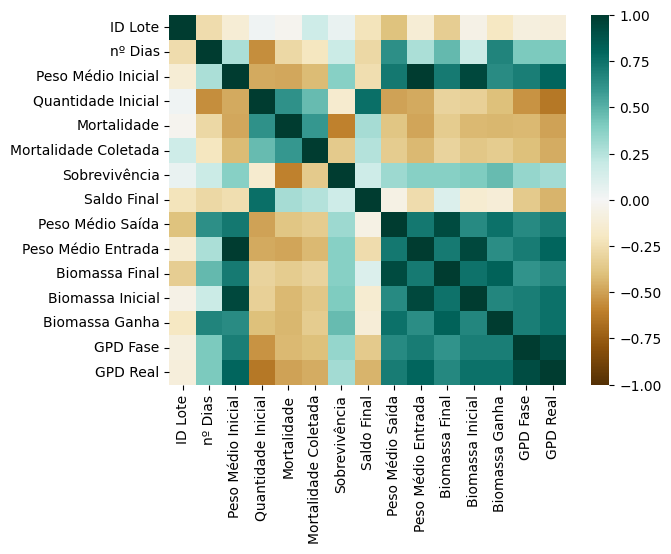

In [ ]:
#ind_new = ind[num_list]
temp_df = prod_num.reset_index(drop=True)
temp_df = prod_num[num_list]
sns.heatmap(temp_df.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')